# Bank's Deposit Prediction

# Problem Statement:-
Une banque portugaise souhaite lancer une campagne de marketing direct par appels téléphoniques pour promouvoir son produit de dépôt à terme. Le dépôt à terme est un produit financier où les clients placent une somme d'argent pour une période déterminée en échange d'un taux d'intérêt fixe. La banque vise à augmenter le nombre de souscriptions à ce produit grâce à cette campagne téléphonique. L’objectif de la campagne vise à prédire si un client souscrira ou non aux dépôts à terme de l’'institution bancaire. 
Le dépôt à terme est essentiel dans le secteur financier car il permet d'optimiser les stratégies marketing et de renforcer l'engagement des clients en ne ciblant que les potentiels. Nous analysons ici les données marketing d'une institution bancaire portugaise basées les enregistrements des appels téléphoniques de leur dernière campagne marketing. Ces derniers enregistrements sont disponibles sous la forme d’un ensemble de données.

# Project Objective :-
Notre objectif est d'identifier les caractéristiques des clients les plus susceptibles d’influencer leur choix de souscrire à des dépôts à terme et de déployer des modèles de prédiction capables de prévoir les résultats avec exactitude.

# Dataset :-
Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. L'ensemble de données utilisé dans ce projet provient de l'ensemble de données Bank Marketing créé par S. Moro, P. Rita et P. Cortez à l'Iscte - Institut universitaire de Lisbonne. Parmi les quatre ensembles de données disponibles, nous avons utilisé bank-full.csv qui contient 21 variables fournissant des informations sur 41188 clients.20 variables prédictives et y qui la variable cible. 
Pour plus d'informations sur l'ensemble de données utilisé, reportez-vous à https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Project Work flow :-

    .Installations et Mise à jour
    .Importation des librairies nécessaires
    .


### Import the necessary librairies

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For plotting (visualisation)
import matplotlib.pyplot as plt
import seaborn as sns

# To sample datasets
from sklearn.utils import resample

#
from sklearn.impute import SimpleImputer

# Description des données  ### Reading Dataset and Basic Data Exploration

In [3]:
# Loading the dataset
bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')
# Displays the dataset charactéristics
bank_df.info()
# To display all columns in the dataset.
pd.set_option('display.max_columns', None)
# Display the dimensions of the data.
bank_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_1912\3127533405.py:2: SyntaxWarning: invalid escape sequence '\B'
  bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')


(41188, 21)

In [4]:
# Display first 5 rows 
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Display the last 5 rows
bank_df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# Display the randomly 5 rows
bank_df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39536,20,student,single,unknown,no,yes,no,cellular,apr,tue,99,1,999,0,nonexistent,-1.8,93.749,-34.6,0.646,5008.7,no
5455,44,management,married,university.degree,no,no,yes,telephone,may,fri,93,8,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16592,40,admin.,divorced,high.school,no,no,no,cellular,jul,wed,1776,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
17918,48,technician,married,professional.course,no,yes,no,telephone,jul,tue,616,11,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
32131,34,blue-collar,married,basic.9y,no,yes,yes,cellular,may,fri,328,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Notre Dataset comprend 21 variables fournissant des informations sur 41188 clients. 20 variables prédictives, dont 10 variabbles numériques et 10 variables catégorielles et y; la variable cible. La mémoire utilisée par le DataFrame est de 6.6+ MB. Les différentes variables sont les suivantes : 

--------
# Bank client data:

---------
1 - Age : It's meanning the client age.

2 - Job : The client type job; There are 12 types job including unknown.

3 - Marital : Marital refers to client's marital status. There are 4 types of marital status including unknown.

4 - Education : Education refers to client's education levels.

5 - Default: which indicates if the client has credit in default or not. However, some client did not specify if they have credit or not.

6 - Housing: which indicates if the client has housing loan or not. However, some client did not specify if they have housing loan or not.

7 - Loan: which indicates if the client has personal loan or not. However, some client did not specify if they have personal loan or not.
----------
# Related with the last contact of the current campaign:

8 - Contact: The type of communication used to contact clients. 

9 - Month: The client last contact month of year.

10 - Day_of_week: The client last contact day of the week.

11 - Duration: The duration of the last contact with the customer in seconds.

# Other attributes:

12 - Campaign: The number of contacts performed during this campaign for this client.

13 - Pdays: The number of days since the customer was last contacted in a previous campaign. 

14 - Previous: The number of times this customer was called before this campaign.

15 - Poutcome: The outcome of the previous marketing campaign for this customer. 

# Social and economic context attributes

16 - Emp.var.rate: The client employment variation rate.

17 - Cons.price.idx: The client consumer price index .     

18 - Cons.conf.idx: The client consumer confidence index.    

19 - Euribor3m: euribor 3 month rate of custumers

20 - Nr.employed: number of employees. 

# Output variable (desired target):

21 -Deposit(y) : if the client has subscribed to a term deposit (yes or no)



In [7]:
# check the duplicate rows

bank_df.duplicated().sum()

12

In [10]:
# Drop the duplicated rows
bank_df = bank_df.drop_duplicates()

In [11]:
# check the duplicate rows

bank_df.duplicated().sum()

0

## VARIABLE CIBLE

Commençons par explorer la distribution cible.

<Axes: xlabel='y', ylabel='count'>

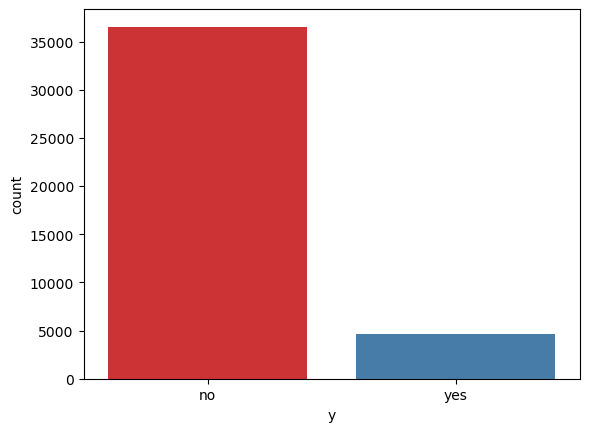

In [6]:
# Let' visualize the target distribution
sns.countplot(data=bank_df, x='y', palette='Set1')

Nous voyons que la variable cible est binaire catégorielle et que les données sont asymétriques. Nous utilisons la technique de sous-échantillonnage de la classe majoritaire pour améliorer cela.

In [7]:
# Make a copy of dataframe
d1=bank_df.copy()
# Separation of majority and minority classes
# Séparation des classes majoritaire et minoritaire
d2 = d1[d1.y=='yes']
d3= d1[d1.y=='no']

df_majority_downsampled = resample(d3, 
                                   replace=False,    # Échantillonnage sans remplacement
                                   n_samples=len(d2),  # Nombre d'échantillons égal à la classe minoritaire
                                   random_state=42)  # Reproductibilité
# Combinaison des échantillons minoritaires et sous-échantillonnés
da_bank = pd.concat([df_majority_downsampled, d3])
# Mélange des données pour éviter tout ordre biaisé
df_balanced = da_bank.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='y', ylabel='count'>

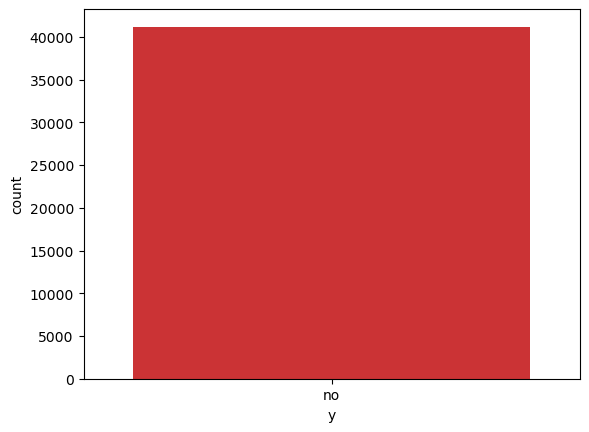

In [8]:
# Visualization of the new distribution
# Visualisation de la nouvelle distribution
sns.countplot(data=da_bank, x='y', palette='Set1')

### Types de Variables

Identifions les variables catégorielles et numériques.

In [9]:
# Identifions les variables numériques ou Filtrer ou selectiooner les colonnes numériques 
num_vars = bank_df.select_dtypes(include=['number']).columns
# Total des variables numériques
len(num_vars)
# Identifier les variables numériques
# numerical_columns = [var for var in bank_df.columns if bank_df[var].dtype == 'O']

10

In [10]:
# Identifions les variables catégorielles
cat_vars = [var for var in bank_df.columns if var not in num_vars]
# Another way to setect categorique variables
# categorical_cols = [var for var in bank_df.columns if bank_df[var].dtype == 'object']
# Total des variables catégorielles
len(cat_vars)
# Cast all variables as categorical
bank_df[cat_vars] = bank_df[cat_vars].astype('category')
# Les variables catégorielles prennent moins de mémoire par rapport aux chaînes de caractères (types 'object')
# car elles sont stockées en tant que codes numériques internement
# Les algorithmes de machine learning s'attendent souvent à ce que les variables catégorielles soient encodées de manière numérique.
# En les castant en 'category', il est plus facile de les encoder par la suite en utilisant des méthodes comme OneHotEncoder ou LabelEncoder.
# Vérifier la conversion
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

## Les Valeurs Manquantes

À partir de la source des données (U.C. Irvine ML Repository), on nous dit que les valeurs manquantes, ou NaN, sont codées sous la forme « 999 ». Puis découvrons les variables de l,ensemble de données contenant des valeurs NaN.

In [11]:
#Make dataframe copy
data_df = bank_df.copy()
# Sélection les variables avec les 999
cat_with_999 = [var for var in bank_df.columns if (bank_df[var] == 999).any()]
#Another way to select tne variables with 999
# cat_with_999 = bank_df.columns[(bank_df == 999).any()]
cat_with_999
# Remplacer les valeurs "999" par NaN
bank_df= bank_df.applymap(lambda x: np.nan if x == 999 else x)
# bankdf = bank_df.replace(999, np.nan, inplace=True)
# bank_df =bank_df.mask(data == 999)
# Liste des variables contenant des valeurs manquantes
vars_with_na = [var for var in bank_df.columns if bank_df[var].isnull().sum() > 0]
# Déterminons le pourcentage de valeurs manquantes et affichONS le résultat classé par % de données manquantes
(bank_df.isnull().sum()/len(bank_df)*100).sort_values(ascending=False)


C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_18092\3950384314.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bank_df= bank_df.applymap(lambda x: np.nan if x == 999 else x)


pdays             96.321744
duration           0.004856
campaign           0.000000
nr.employed        0.000000
euribor3m          0.000000
cons.conf.idx      0.000000
cons.price.idx     0.000000
emp.var.rate       0.000000
poutcome           0.000000
previous           0.000000
age                0.000000
job                0.000000
day_of_week        0.000000
month              0.000000
contact            0.000000
loan               0.000000
housing            0.000000
default            0.000000
education          0.000000
marital            0.000000
y                  0.000000
dtype: float64

In [94]:
data_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')
data_df['pdays'] = data_df['pdays'].replace(999, -1)
data_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_18092\1554440984.py:1: SyntaxWarning: invalid escape sequence '\B'
  data_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [96]:
# Let's replace 'y' target variable  into integres before any visualisations
data_df['y'] = data_df['y']. apply(lambda x:1 if x=='yes' else 0)
# Rename the target variable into 'client_subscribed'
data_df.rename(columns={"y": "client_subscribed"}, inplace=True)

In [97]:
# Regardons la fraction de NA.
data_df.isnull().mean()

age                  0.0
job                  0.0
marital              0.0
education            0.0
default              0.0
housing              0.0
loan                 0.0
contact              0.0
month                0.0
day_of_week          0.0
duration             0.0
campaign             0.0
pdays                0.0
previous             0.0
poutcome             0.0
emp.var.rate         0.0
cons.price.idx       0.0
cons.conf.idx        0.0
euribor3m            0.0
nr.employed          0.0
client_subscribed    0.0
dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'client_subscribed'}>, <Axes: >]],
      dtype=object)

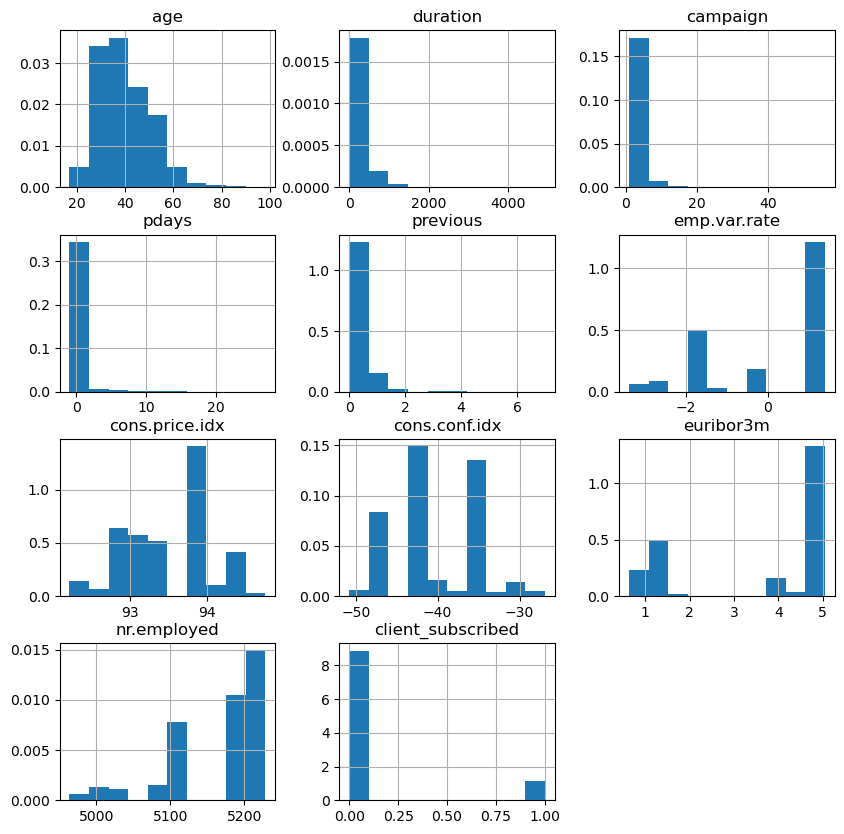

In [99]:
data_df.hist(figsize=(10, 10), density=True)

### Imputation des valeurs manquantes
Si vous pensez que la variable 'pdays' est importante pour votre analyse ou modèle, vous pouvez imputer les valeurs manquantes avec des techniques telles que :

1.Imputation par une valeur fixe (comme 0 ou la moyenne).

2.Imputation par la moyenne ou la médiane.

3.Imputation par une méthode plus avancée comme KNN ou MICE.

## Relationship between 'pdays' and 'y'

Est-ce que la variable 'pdays' apporte t'elle des informations pertinentes sur notre dataset? Si non, on peut la supprimer de notre dataset parce qu'elle contient 96,32 % de valeurs NaN.

In [100]:
#Make dataframe copy
data1_df = bank_df.copy()
# Création d'une variable indicatrice pour les valeurs manquantes de 'pdays'
data1_df['pdays_missing'] = data1_df['pdays'].isna().astype(int)
# Imputation des valeurs manquantes de 'pdays' par la médiane
imputer = SimpleImputer(strategy='median')
data1_df['pdays'] = imputer.fit_transform(data1_df[['pdays']])
data1_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,6.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [101]:
# Regardons la fraction de NA.
data1_df.isnull().mean()

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000049
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
pdays_missing     0.000000
dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'pdays_missing'}>, <Axes: >]],
      dtype=object)

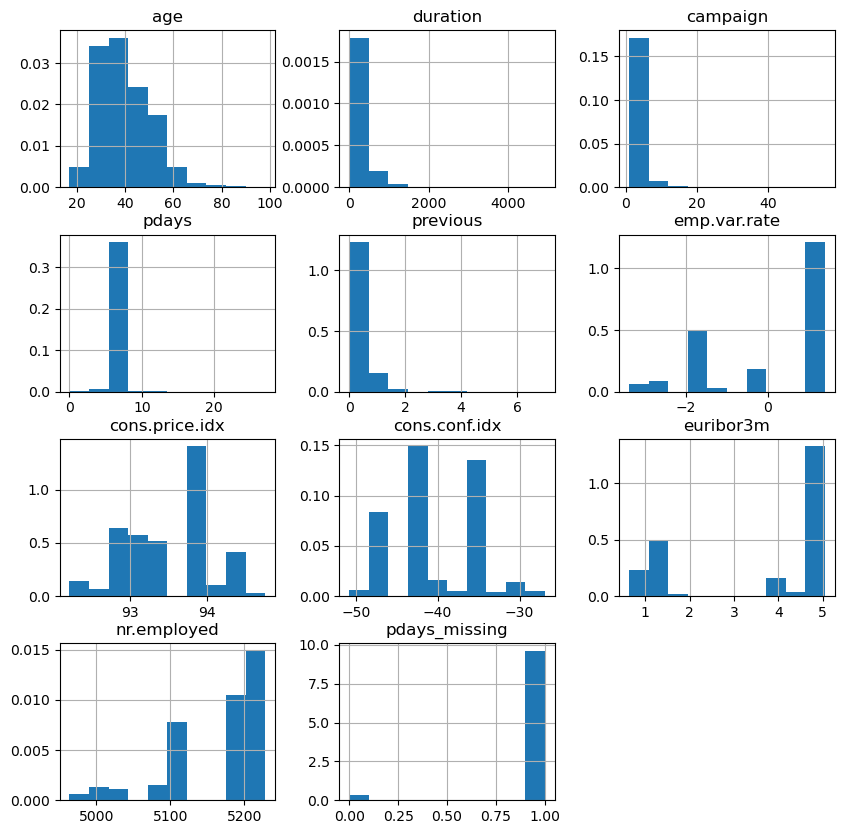

In [102]:
data1_df.hist(figsize=(10, 10), density=True)

In [103]:
bank_df['pdays'].unique()

array([nan,  6.,  4.,  3.,  5.,  1.,  0., 10.,  7.,  8.,  9., 11.,  2.,
       12., 13., 14., 15., 16., 21., 17., 18., 22., 25., 26., 19., 27.,
       20.])

In [41]:
# Faites une copie du dataframe
data1_df = bank_df.copy()
# Imputation par valeur fixe
data1_df['pdays'].fillna(0, inplace=True)
data1_df.head()

C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_3068\1029834814.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1_df['pdays'].fillna(0, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,0.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
#Make dataframe copy
data2_df = bank_df.copy()
# Création d'une variable indicatrice pour les valeurs manquantes de 'pdays'
data2_df['pdays_missing'] = data2_df['pdays'].isna().astype(int)
# Imputation des valeurs manquantes de 'pdays' par la moyenne
imputer = SimpleImputer(strategy='mean')
data2_df['pdays'] = imputer.fit_transform(data2_df[['pdays']])
data2_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [ ]:
# Examiner la relation entre deux variables
# pd.crosstab est une fonction qui crée une table de contingence (ou tableau croisé) pour examiner la relation entre deux variables
# pour comprendre comment les différentes valeurs de 'pdays' sont réparties en fonction des catégories de 'poutcome'.
# Vous pouvez utiliser pd.crosstab pour explorer les données et comprendre les relations entre les variables 
# avant d'appliquer des méthodes d'imputation appropriées.

In [ ]:
# Une fonction pour explorer 3 varaibles.

In [46]:
#Make dataframe copy
data3_df = bank_df.copy()
# Création d'une variable indicatrice pour les valeurs manquantes de 'pdays'
data3_df['pdays_missing'] = data3_df['pdays'].isna().astype(int)
# Imputation des valeurs manquantes de 'pdays' par la médiane au sein de chaque groupe 'poutcome'
data3_df['pdays'] = data3_df.groupby('poutcome')['pdays'].transform(lambda x: x.fillna(x.median()))
data3_df.head()

C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_3068\3451588880.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data3_df['pdays'] = data3_df.groupby('poutcome')['pdays'].transform(lambda x: x.fillna(x.median()))


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [50]:
data1_df.loc[(bank_df["housing"]=="no") & (data1_df["pdays"]=="6.0") , ["poutcome","pdays"]]

,poutcome,pdays


In [44]:
# Remplacer les valeurs '999' de 'pdays' par NaN
bank_df['pdays'] = bank_df['pdays'].replace(999, np.nan)

In [48]:
bank_df['pdays']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
41183   NaN
41184   NaN
41185   NaN
41186   NaN
41187   NaN
Name: pdays, Length: 41188, dtype: float64

In [52]:
# Calculer la moyenne de 'pdays' pour chaque catégorie de 'y'
pdays_mean = bank_df.groupby('y')['pdays'].mean()
print("Moyenne de 'pdays' pour chaque catégorie de 'y':")
print(pdays_mean)

Moyenne de 'pdays' pour chaque catégorie de 'y':
y
no     6.193431
yes    5.913133
Name: pdays, dtype: float64


In [53]:
# Fonction pour imputer les valeurs manquantes de 'pdays'
def impute_pdays(row):
    if pd.isna(row['pdays']):
        return pdays_mean[row['y']]
    else:
        return row['pdays']

In [54]:
# Appliquer l'imputation
bank_df['pdays'] = bank_df.apply(impute_pdays, axis=1)

# Vérifier les modifications
print(bank_df['pdays'].head(10))

0    6.193431
1    6.193431
2    6.193431
3    6.193431
4    6.193431
5    6.193431
6    6.193431
7    6.193431
8    6.193431
9    6.193431
Name: pdays, dtype: float64


In [55]:
bank_df['pdays']

0        6.193431
1        6.193431
2        6.193431
3        6.193431
4        6.193431
           ...   
41183    5.913133
41184    6.193431
41185    6.193431
41186    5.913133
41187    6.193431
Name: pdays, Length: 41188, dtype: float64

In [46]:
# Calculer la distribution de 'pdays' pour chaque catégorie de 'y'
pdays_distribution = bank_df.groupby('y')['pdays'].describe()
print("\nDistribution de 'pdays' pour chaque catégorie de 'y':")
print(pdays_distribution)


Distribution de 'pdays' pour chaque catégorie de 'y':
     count      mean       std  min  25%  50%  75%   max
y                                                       
no   548.0  6.193431  3.987525  0.0  3.0  6.0  9.0  22.0
yes  967.0  5.913133  3.727896  0.0  3.0  6.0  6.0  27.0


c:\Users\Aboubacar\.conda\envs\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aboubacar\.conda\envs\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aboubacar\.conda\envs\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aboubacar\.conda\envs\.venv\Lib\site-packages\seaborn\_oldcore.

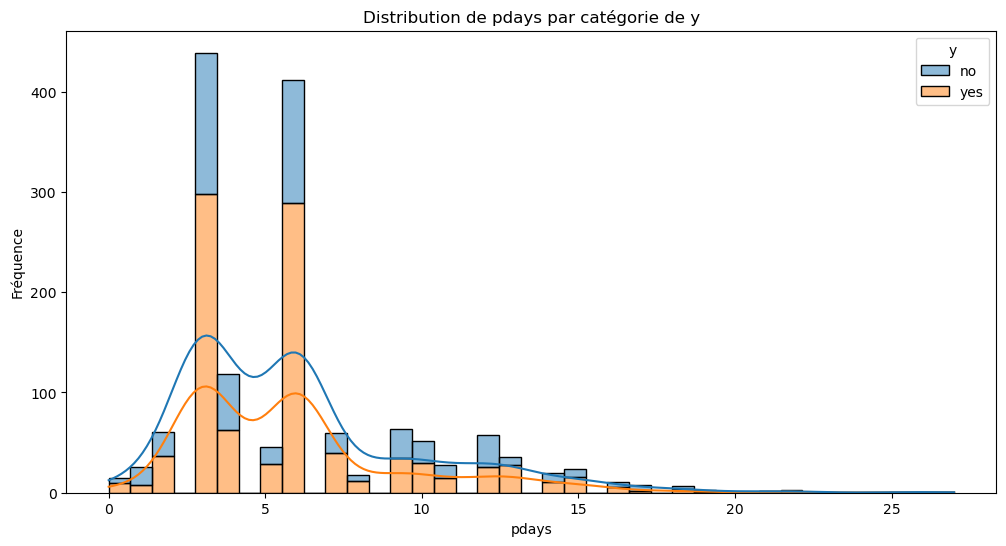

In [47]:
# Histogramme de 'pdays' pour chaque catégorie de 'y'
plt.figure(figsize=(12, 6))
sns.histplot(bank_df, x='pdays', hue='y', multiple='stack', kde=True)
plt.title('Distribution de pdays par catégorie de y')
plt.xlabel('pdays')
plt.ylabel('Fréquence')
plt.show()

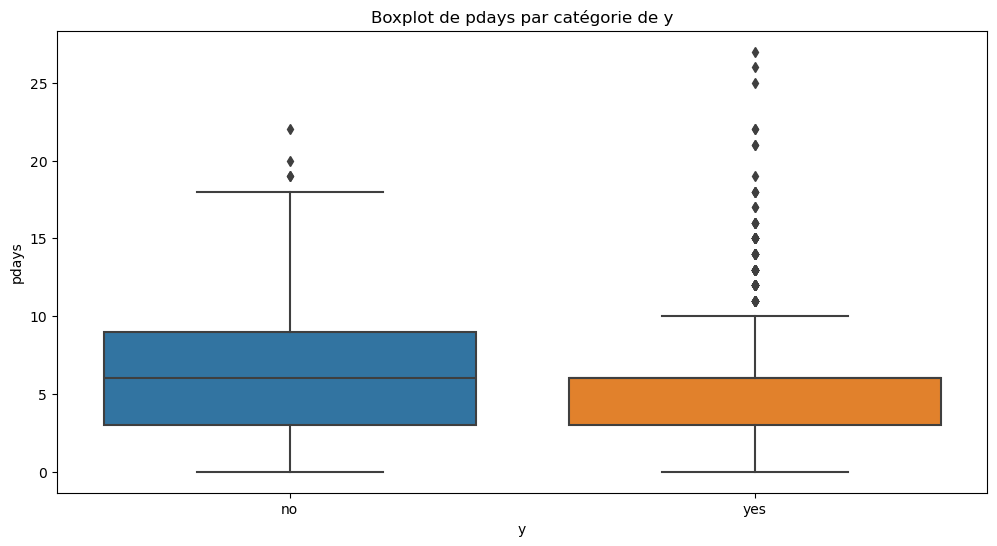

In [50]:
# Boxplot de 'pdays' pour chaque catégorie de 'y'
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='pdays', data=bank_df)
plt.title('Boxplot de pdays par catégorie de y')
plt.xlabel('y')
plt.ylabel('pdays')
plt.show()

In [57]:
pd.crosstab(bank_df["pdays"],bank_df["y"],margins=True)

y,no,yes,All
pdays,,,
0.0,5,10,15
1.0,18,8,26
2.0,24,37,61
3.0,141,298,439
4.0,55,63,118
5.0,17,29,46
5.913133,0,3673,3673
6.0,123,289,412
6.193431,36000,0,36000
